In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)

In [2]:
from pandas_profiling import ProfileReport

In [3]:
data = pd.read_csv('bank-additional.csv',sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [4]:
profile = ProfileReport(data, title='Bank Addional Pandas Profiling report')
profile.to_file('report.html')  

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df = data.copy()

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
object_col=df.columns[df.dtypes=="object"]
object_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [8]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())
#with taht we can see the several output,that we have in our columns than unique.
#admin had a dot at the end. I think it is better if I remove that

['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
['married' 'single' 'divorced' 'unknown']
['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
['no' 'unknown' 'yes']
['yes' 'no' 'unknown']
['no' 'unknown' 'yes']
['cellular' 'telephone']
['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
['fri' 'wed' 'mon' 'thu' 'tue']
['nonexistent' 'failure' 'success']
['no' 'yes']


In [9]:
my_df.pdays.value_counts(dropna=False)
#If you don't have a contact ,you take 999

NameError: name 'my_df' is not defined

In [ ]:
df.pdays.replace(999,0,inplace=True)

In [ ]:
my_df.pdays.value_counts(dropna=False)
#there are no 999

0     3959
3       52
6       42
4       14
7       10
10       8
12       5
5        4
2        4
1        3
9        3
16       2
13       2
18       2
15       2
19       1
17       1
11       1
21       1
14       1
Name: pdays, dtype: int64

In [ ]:
df[df.job == 'admin.']  #there are in 1012 rows admin.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,0,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290,4,0,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
12,36,admin.,married,high.school,no,no,no,telephone,may,wed,97,2,0,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
14,29,admin.,single,high.school,no,no,no,cellular,may,fri,553,2,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
16,44,admin.,divorced,university.degree,no,no,no,cellular,jul,wed,191,6,0,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4108,32,admin.,married,university.degree,no,yes,no,telephone,may,thu,151,5,0,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
4113,31,admin.,single,university.degree,no,yes,no,cellular,nov,thu,463,1,0,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,0,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,0,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no


In [ ]:
df.replace(['admin.'],'admin',inplace=True)

In [ ]:
df[df.job == 'admin.']  #now there are no admin.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [ ]:
object_col=df.columns[df.dtypes=="object"]
object_col

for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

    #thre are unknown ,I wanna change that to NaN

job
----------------
admin            1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64
----------------------------------------
marital
----------------
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64
----------------------------------------
education
----------------
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64
----------------------------------------
default
----------------
no         3315
unknown     803
yes           1
Name: default, dtype: int64
----------------------------------------
housing
----------------

In [ ]:
df.y.value_counts(dropna=False)

# Our data can be a imbalance data, 
# but yet it is early to say that,we must look at our confusion_report or score

no     3668
yes     451
Name: y, dtype: int64

In [ ]:
df.replace(['unknown'],np.nan, inplace=True)  # I replaced the 'unknown' to np.none

In [ ]:
df.isnull().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [ ]:
df.shape

(4119, 21)

In [ ]:
df_after_drop = df.dropna()

In [ ]:
df_after_drop.shape   #If I drop that I will lose about 1000 observation,that is terribel

(3090, 21)

# Handling with missing Value

### Handling with missing value from Default

In [ ]:
df.default.value_counts(dropna=False) 
#that is relevant with credit ,whether he has a credit or not
#the ratio can be like y columns
#because of that I'll change the NaN value to yes. with that can be the ratio like y columns

no     3315
NaN     803
yes       1
Name: default, dtype: int64

In [ ]:
df.default.replace([np.nan],'unknown',inplace=True)

In [ ]:
df.default.value_counts(dropna=False)

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [ ]:
df[df.default == 'yes']
#there is only one sample from this kind,I wanna drop this row
#because to fit a atrribute we need  at least 15-20 rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3514,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,111,2,0,1,failure,-0.1,93.2,-42.0,4.153,5195.8,no


In [ ]:
df =df.drop(3514)

In [ ]:
df[df.default == 'yes']   #now there is no this row

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [ ]:
#Madem Data Science eski gözlemlere bakip,yeni tahminler yapmaksa,bende eski gözlemlere bakarak bu unknown'un 
#yes'e mi yoksa no'ya mi ait oldugunu belirlemeye calisayim

In [ ]:
df[df.y == 'no'].groupby('default',dropna=False).count()['y']

#that say us,if default = 'no' is, 2913 of the people didn't get a subscribe y=0
#there is only one of this group,his default = yes an didn't get subscribe

default
no         2913
unknown     754
Name: y, dtype: int64

In [ ]:
df[df.y == 'yes'].groupby('default',dropna=False).count()['y']

#that say us,if default = 'no' is, 402 of the people did get a subscribe
#

default
no         402
unknown     49
Name: y, dtype: int64

In [ ]:
df[df.default == 'unknown'].groupby('y',dropna=False).count()

#hier we see that,if you have a default, it is diffucullt to get a subsibrice
#y->no->754
#y->yes->49

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,754,737,753,711,754,731,731,754,754,754,754,754,754,754,754,754,754,754,754,754
yes,49,48,49,44,49,48,48,49,49,49,49,49,49,49,49,49,49,49,49,49


In [ ]:
df[df.y == 'yes'].groupby('default',dropna=False).count()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
default,,,,,,,,,,,,,,,,,,,,
no,402,399,401,381,394,394,402,402,402,402,402,402,402,402,402,402,402,402,402,402
unknown,49,48,49,44,48,48,49,49,49,49,49,49,49,49,49,49,49,49,49,49


In [ ]:
# I let the features default than 'no' and 'unknown' .I couldn't decide wheter I dop the 'unknown' or assign to 'no'
#because of that we have under features default 'no' and 'unknown' I dropped the row about 'yes' that was only a row

In [ ]:
df.isnull().sum()

age                 0
job                39
marital            11
education         167
default             0
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

###  Handling with missing values of education

In [ ]:
df.education.value_counts(dropna=False)  #I see the NaN value

university.degree      1264
high.school             920
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
NaN                     167
illiterate                1
Name: education, dtype: int64

In [ ]:
df[df.education == 'illiterate']    #that has only one sample.because of that I wanna drop that

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3926,42,retired,divorced,illiterate,no,no,no,cellular,aug,wed,146,4,0,0,nonexistent,-2.9,92.201,-31.4,0.834,5076.2,no


In [ ]:
df = df.drop(3926)

In [ ]:
df.groupby('education',dropna=False)['y'].describe().T 

 #the top of frequency  is 'no',I think, the most of the NaN group won't get a credit

education,basic.4y,basic.6y,basic.9y,high.school,professional.course,university.degree,NaN
count,429,228,574,920,535,1264,167
unique,2,2,2,2,2,2,2
top,no,no,no,no,no,no,no
freq,391,211,531,823,470,1099,141


In [ ]:
print((str(391/429)+' basic.4y'))  #basic.4y
print(str(211/228)+' basic.6y')    #basic.6y
print(str(531/574)+' basic.9y')    #basic.9y
print((str(823/920)+' high.school'))    #high.school
print((str(470/535)+' professional.course'))    #professional.course
print((str(1099/1264)+' university.degree'))  #university.degree
print((str(141/167)+'  NaN'))    #NaN


#the NaN ist nearest to university.degree,bucause that value is ratio
# because of that, I decided to change NaN value to university.degree
#if I add this NaN rows to university deggre ,I don't worsen the ratio,because the value are near to them

0.9114219114219114 basic.4y
0.9254385964912281 basic.6y
0.9250871080139372 basic.9y
0.8945652173913043 high.school
0.8785046728971962 professional.course
0.8694620253164557 university.degree
0.844311377245509  NaN


In [ ]:
df.education.replace(np.nan,'university.degree',inplace=True)

In [ ]:
df.education.value_counts(dropna=False)  #done.There is no NaN

university.degree      1431
high.school             920
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
Name: education, dtype: int64

###  Handling with missing values of Housing

In [ ]:
# than domain Knowladge I think this features is importance for our target
# because if you have a housing ,it depents my decision to make a subscribe

In [ ]:
df.isnull().sum()

age                 0
job                39
marital            11
education           0
default             0
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [ ]:
df.housing.value_counts(dropna=False)

yes    2175
no     1837
NaN     105
Name: housing, dtype: int64

In [ ]:
df.groupby('housing',dropna=False)['y'].describe().T 

#that say us, 1635 people don't have  a housing loan.but even though they saw 'no'
#and 1935 people have a housing loan. bur even though they saw 'yes' 

#we can see the ratio to them

housing,no,yes,NaN
count,1837,2175,105
unique,2,2,2
top,no,no,no
freq,1635,1935,96


In [ ]:
print(str((round((1635/1837),3)))+ ' don"t have housing and saw-> no')
print()
print(str((round((1935/2175),3)))+ ' have housing and saw-> no')
print()
print(str((round((96/105),3)))+ ' unknown -saw->no')

0.89 don"t have housing and saw-> no

0.89 have housing and saw-> no

0.914 unknown -saw->no


In [ ]:
#for housing I couldn't decide how can I assign those missing value,
# I let that than 'unknown'

In [ ]:
df.housing.replace(np.nan,'unknown',inplace=True)

### Handling with missing value of Loan

In [ ]:
df.loan.value_counts(dropna=False)

no     3347
yes     665
NaN     105
Name: loan, dtype: int64

In [ ]:
df.groupby('loan',dropna=False)['y'].describe().T 

loan,no,yes,NaN
count,3347,665,105
unique,2,2,2
top,no,no,no
freq,2973,597,96


In [ ]:
print(str((round((2973/3347),2)))+ ' don"t have loan and saw-> no')
print()
print(str((round((597/665),2)))+ ' have loan and saw-> no')
print()
print(str((round((96/105),2)))+ ' unknown -saw->no')

#I think I can add the NaN value to yes group,because the ratio is close to each other 

0.89 don"t have loan and saw-> no

0.9 have loan and saw-> no

0.91 unknown -saw->no


In [ ]:
df.loan.replace(np.nan,'yes',inplace=True)

In [ ]:
df.isnull().sum()

age                0
job               39
marital           11
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
y                  0
dtype: int64

In [ ]:
df.job.value_counts(dropna=False)

admin            1012
blue-collar       884
technician        691
services          393
management        324
retired           165
self-employed     159
entrepreneur      148
housemaid         110
unemployed        110
student            82
NaN                39
Name: job, dtype: int64

## Handlind with missing value of job

In [ ]:
df.groupby('job',dropna=False)['y'].describe().T 

job,admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,NaN
count,1012,884,148,110,324,165,159,393,82,691,110,39
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,no,no,no,no,no,no,no,no,no,no,no,no
freq,879,823,140,99,294,127,146,358,63,611,91,35


In [ ]:
df.groupby('job',dropna=False)['y'].describe().iloc[5,3]

127

In [ ]:
print(str((round((879/1012),2)))+ ' no say of admin')
print()
print(str((round((823/884),2)))+ ' no say of blue')
print()
print(str((round((140/148),2)))+ ' no say of entrepreneur')
print()
print(str((round((99/110),2)))+ ' no say of housemaid')
print()
print(str((round((294/324),2)))+ ' no say of management')
print()
print(str((round((127/165),2)))+ ' no say of retired')
print()
print(str((round((146/159),2)))+ ' no say of self employment')
print()
print(str((round((358/393),2)))+ ' no say of services')
print()
print(str((round((63/82),2)))+ ' no say of student')
print()
print(str((round((611/691),2)))+ ' no say of technician')
print()
print(str((round((91/110),2)))+ ' no say of unemployed')
print()
print(str((round((35/39),2)))+ ' no say of NaN')

0.87 no say of admin

0.93 no say of blue

0.95 no say of entrepreneur

0.9 no say of housemaid

0.91 no say of management

0.77 no say of retired

0.92 no say of self employment

0.91 no say of services

0.77 no say of student

0.88 no say of technician

0.83 no say of unemployed

0.9 no say of NaN


In [ ]:
# I can add the NaN value to housemaid
#I must to replace the NaN to Housemaid

In [ ]:
df.job.replace(np.nan,'housemaid',inplace=True)

In [ ]:
df.isnull().sum()

age                0
job                0
marital           11
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
y                  0
dtype: int64

### Handling with missing value of marital columns

In [ ]:
df.marital.value_counts(dropna=False)

married     2508
single      1153
divorced     445
NaN           11
Name: marital, dtype: int64

In [ ]:
df.groupby('marital',dropna=False)['y'].describe().T 

marital,divorced,married,single,NaN
count,445,2508,1153,11
unique,2,2,2,2
top,no,no,no,no
freq,402,2256,998,10


In [ ]:
print(str((round((402/445),4)))+ ' no say of divorced')
print()
print(str((round((2256/2508),4)))+ ' no say of married')
print()
print(str((round((998/1153),4)))+ ' no say of single')
print()
print(str((round((10/11),4)))+ ' no say of NaN')

0.9034 no say of divorced

0.8995 no say of married

0.8656 no say of single

0.9091 no say of NaN


In [ ]:
df.marital.replace(np.nan,'divorced',inplace=True)

In [ ]:
my_df = df   # my_df is my df,that I removed the missing value manual

In [ ]:
my_df.isnull().sum().sum()

# the is no NaN in my_df

0

In [ ]:
my_df.pdays.value_counts(dropna=False)

0     3959
3       52
6       42
4       14
7       10
10       8
12       5
5        4
2        4
1        3
9        3
16       2
13       2
18       2
15       2
19       1
17       1
11       1
21       1
14       1
Name: pdays, dtype: int64

In [ ]:
my_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,0,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,0,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,yes,telephone,jun,fri,17,3,0,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin,married,university.degree,no,yes,no,cellular,nov,mon,58,1,0,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,0,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin,married,high.school,no,yes,no,telephone,jul,fri,219,1,0,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,0,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin,married,high.school,no,no,no,cellular,aug,fri,528,1,0,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


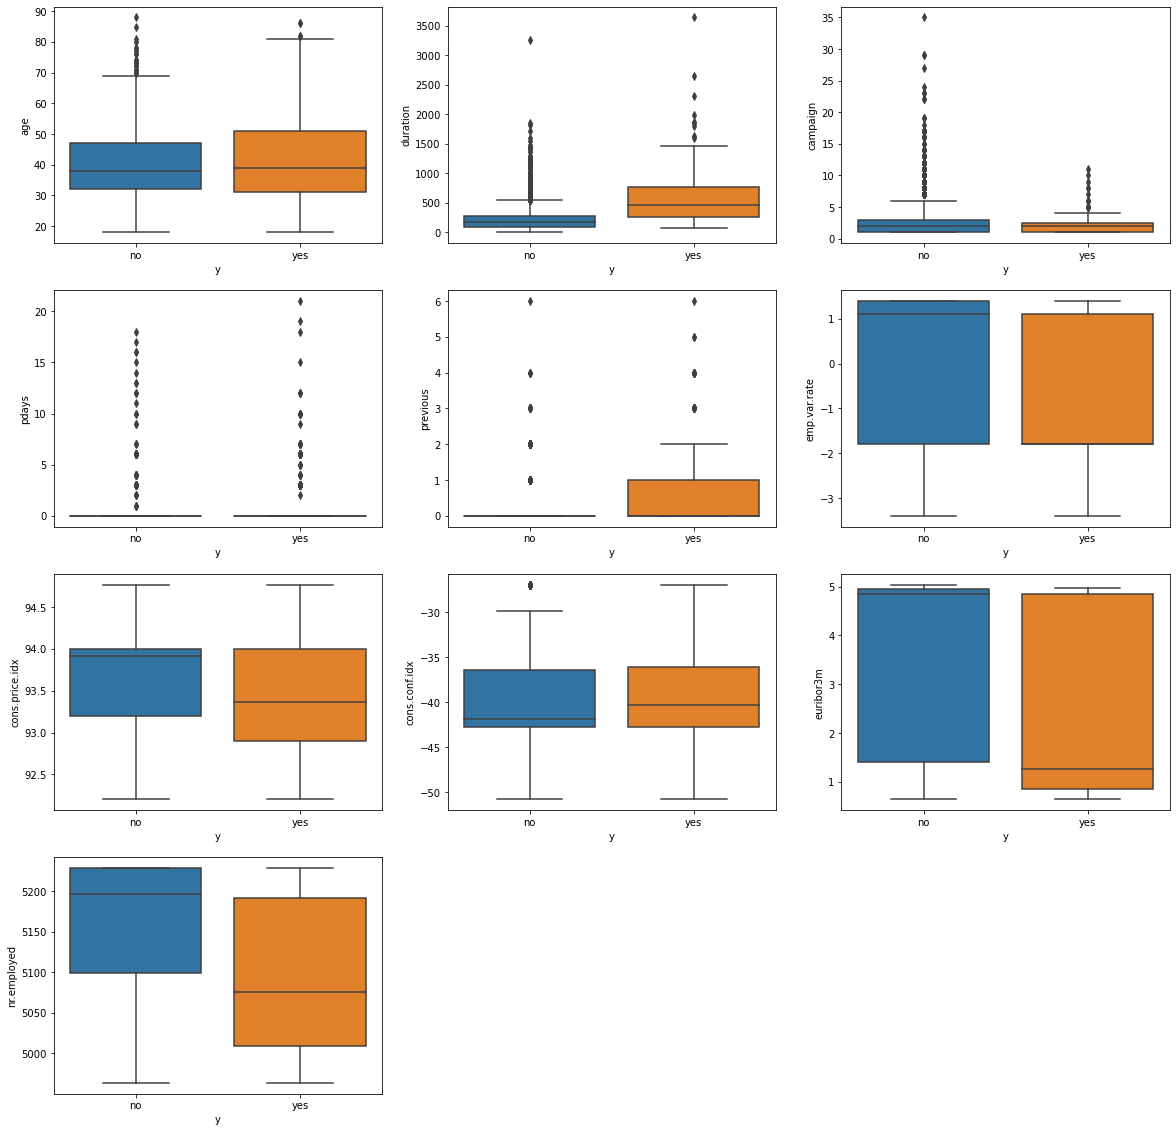

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in my_df.select_dtypes("number").columns:
    if feature != "y":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='y',y=feature,data=my_df)
plt.show()

### Filling the missing value of Housung with KNN method

In [ ]:
df_KNN = data.copy()

In [ ]:
df_KNN

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [ ]:
col_names = list(df)

In [ ]:
col_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [ ]:
n_df = np.array(df)  #we transform the data to np.array

In [ ]:
n_df

array([[30, 'blue-collar', 'married', ..., 1.313, 5099.1, 'no'],
       [39, 'services', 'single', ..., 4.855, 5191.0, 'no'],
       [25, 'services', 'married', ..., 4.962, 5228.1, 'no'],
       ...,
       [27, 'student', 'single', ..., 1.354, 5099.1, 'no'],
       [58, 'admin', 'married', ..., 4.966, 5228.1, 'no'],
       [34, 'management', 'single', ..., 4.12, 5195.8, 'no']],
      dtype=object)

In [ ]:
from ycimpute.imputer import knnimput

my_df = knnimput.KNN(k = 4).complete(n_df) #doldurma islemini yapacak

#4 komsuluk degeri,4 komsuya göre yapiyor

ValueError: Input matrix is not missing any values